# Part II - (Exploration Fifa World Cup)
## by (Onke Spengane)

## Investigation Overview

The presentation focuses on three things continents, countries and participation. I began by presenting nations with the most elevated appearance, then a bunch of plots which show the connection between countries and continents. Finally, I presented plots with participation as the area of concentration


## Dataset Overview

This project highlights three datasets downloaded from Kaggle (Data Source). The first dataset contains essential match data, for example, the home team's continent, stadium, city, ref name, etc. The second dataset contains player data, for example, player name, position, etc. The last dataset includes data about the competition, for example, the champs, other participants, matches played, goals scored and so on.

In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [56]:
# load in the dataset into a pandas dataframe
worldCup_matches_df = pd.read_csv('./fifa-world-cup/WorldCupMatches.csv')
worldCup_players_df = pd.read_csv('./fifa-world-cup/WorldCupPlayers.csv')
worldCup_df = pd.read_csv('./fifa-world-cup/WorldCups.csv')

### Assessig data

#### WorldCup_matches_df

In [57]:
worldCup_matches_df.head();

In [104]:
worldCup_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [59]:
match_duplicates_sum = sum(worldCup_matches_df.duplicated())
match_duplicates_sum;

In [60]:
worldCup_matches_df[worldCup_matches_df['Year'].isnull()];
worldCup_matches_df.iloc[[850,851]];

In [61]:
worldCup_matches_df.Stage.unique();
worldCup_matches_df['Home Team Name'].unique();
worldCup_matches_df['Away Team Name'].unique();
len(worldCup_matches_df['Home Team Name'].unique());
len(worldCup_matches_df['Away Team Name'].unique());

#### WorldCup_players_df

In [62]:
worldCup_players_df.head();

In [106]:
worldCup_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


In [64]:
players_duplicate_sum = sum(worldCup_players_df.duplicated())
players_duplicate_sum;

#### WorldCup_df

In [65]:
worldCup_df.head(20);

In [107]:
worldCup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Host Country    20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [67]:
worldCup_df['Country'].unique();
worldCup_df['Winner'].unique();
worldCup_df['Runners-Up'].unique();
worldCup_df['Third'].unique();
worldCup_df['Fourth'].unique();

I have assessed the data programmatically and visually displayed, I have identified some issues in the datasets, the following issues are addressed in the following cells.

#### WorldCup_match_df data

- Stage column has inconsistent values
- Some rows are duplicated
- There are some datatype that are incorrect should be int instead of float
- There is a lot of rows with NaN values

#### WorldCup_players_df data

- Some rows in the data are duplicated

#### WorldCup_df data

- The 'Attendence' column has got incorrect datatype

### Cleaning data

> Here will be tiding up and improving the quality of the datasets and try to make is as clean as possible.

In [68]:
matches_clean_df = worldCup_matches_df.copy()

In [69]:
# dropping duplicated data

matches_clean_df.drop_duplicates(inplace = True)

In [70]:
# dropping rows with NaN values

matches_clean_df.dropna(inplace = True)

The stage column has got incosistent values will be replacing them so that we can have consistent values

In [71]:
# inconsistent values are replace
old_data_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']

new_data_groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F'] 

old_stage_runUps = ['Match for third place', 'Play-off for third place']

new_stage_runUps = 'Third place'

matches_clean_df['Stage'].replace(old_data_groups, new_data_groups, inplace = True)

matches_clean_df['Stage'].replace(old_stage_runUps, new_stage_runUps, inplace = True)

As some column have incorrect datatypes will be sorting that out and will also change "Datetime" datatype to a differnt one.

In [72]:
# changing columns from float datatype to int

for column in matches_clean_df.columns:
    if matches_clean_df[column].dtype == float:
        matches_clean_df[column] = matches_clean_df[column].astype(int)

In [73]:
# changing column "Datatime" to a diffent datatype

matches_clean_df.Datetime = pd.to_datetime(matches_clean_df.Datetime)

In [74]:
# here will be extracting the month from 'Datatime' column

months = {0: 'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

matches_clean_df['Month'] = matches_clean_df['Datetime'].dt.month.map(months)

I will be a adding a new columns to the matches_clean_df  which contains the corresponding continent of each country.

In [75]:
continents = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [76]:
continents.sample(5);

Here I will be changing country names at the time of tournaments to new names

In [77]:
old_country_name = ['rn">United Arab Emirates', 'rn">Republic of Ireland', 
            'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
            "C�te d'Ivoire", 'rn">Bosnia and Herzegovina',
           ]

new_country_name = ['United Arab Emirates', 'Republic of Ireland', 
            'Trinidad and Tobago', 'Serbia and Montenegro',
            "Cote d'Ivoire", 'Bosnia and Herzegovina',
           ]
    
matches_clean_df[['Home Team Name', 'Away Team Name']] = (
    matches_clean_df[['Home Team Name', 'Away Team Name']].replace(old_country_name, new_country_name)
)

The are countries with missing continents in the 'continent file', if any exist, will be are added manually.

In [78]:
home_countries = matches_clean_df['Home Team Name']

away_countries = matches_clean_df['Away Team Name']

In [79]:
missing_home = home_countries[~home_countries.isin(continents.Country)].unique()
missing_home;

In [80]:
missing_away = away_countries[~away_countries.isin(continents.Country)].unique()
missing_away;

In [81]:
additional_continents = {'England': 'Europe', 'Wales': 'Europe', 'Scotland': 'Europe', 
                         'Republic of Ireland': 'Europe', 'Northern Ireland': 'Europe',
                         'USA': 'North America', 'Congo DR': 'Africa', 
                         "Cote d'Ivoire": 'Africa', 'Korea DPR': 'Asia',
                         'Dutch East Indies': 'Asia', 'Korea Republic': 'Asia',
                         'Germany FR': 'Europe', 'Soviet Union': 'Asia', 
                         'German DR': 'Europe', 'Zaire': 'Africa', 'Russia': 'Asia', 
                         'China PR': 'Asia', 'Czech Republic': 'Europe',
                         'Serbia and Montenegro': 'Europe', 'IR Iran': 'Asia',
                         'Yugoslavia': 'Europe', 'Czechoslovakia': 'Europe'
                        }


In [82]:
# here I will be convert additional_contents to dataframe

additional_continents_df = pd.DataFrame(additional_continents.items(), columns=['Country', 'Continent'])
additional_continents_df;


In [83]:
# here will be adding 'additional_continents_df' to 'continents'
continent = continents.append(additional_continents_df)
continent;

In [84]:
# here will create two new columns corresponding to the continents of Home and Away countries on the data that we already have.

matches_clean_df = pd.merge(continent, matches_clean_df, right_on = 'Home Team Name', left_on = 'Country')

matches_clean_df = pd.merge(continent, matches_clean_df, right_on = 'Away Team Name', left_on = 'Country')
matches_clean_df;

In [85]:
# renaming columns

matches_clean_df.rename(columns = {'Continent_x' : 'Away Team Continent', 'Continent_y' : 'Home Team Continent'}, inplace = True) 

In [86]:
# droping unwanted columns columns

matches_clean_df.drop(columns = ['Country_x', 'Country_y'], inplace = True)
matches_clean_df;

In [87]:
players_clean_df = worldCup_players_df

In [88]:
# drop duplicates
players_clean_df.drop_duplicates(inplace = True)

In [108]:
players_clean_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


Here will be sorting attendance values by year.

In [90]:
worldCup_clean_df = worldCup_df

In [91]:
sort_attendance = list(matches_clean_df.query('Stage == "Final"').sort_values(by= "Year").Attendance.values)
sort_attendance.insert(3, 173850)


In [92]:
worldCup_clean_df["Attendance"] = sort_attendance
worldCup_clean_df;

In [93]:
# will be renaming 'Country' column in 'world_clean_df' to avoid overlapping when merging

worldCup_clean_df.rename(columns = {'Country': 'Host Country'}, inplace = True)

In [94]:
columns = ['Winner', 'Runners-Up', 'Third', 'Fourth']

for column in columns:
    worldCup_clean_df= pd.merge(continent, worldCup_clean_df, right_on = column, left_on = 'Country')
    worldCup_clean_df.drop('Country', axis = 1, inplace = True)
    new_name = column + ' Continent'
    worldCup_clean_df.rename(columns = {'Continent': new_name}, inplace = True)

worldCup_clean_df.head();

In [109]:
worldCup_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fourth Continent      20 non-null     object
 1   Third Continent       20 non-null     object
 2   Runners-Up Continent  20 non-null     object
 3   Winner Continent      20 non-null     object
 4   Year                  20 non-null     int64 
 5   Host Country          20 non-null     object
 6   Winner                20 non-null     object
 7   Runners-Up            20 non-null     object
 8   Third                 20 non-null     object
 9   Fourth                20 non-null     object
 10  GoalsScored           20 non-null     int64 
 11  QualifiedTeams        20 non-null     int64 
 12  MatchesPlayed         20 non-null     int64 
 13  Attendance            20 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ KB


## What number of counties from the different continents have participated in the FIFA World Cup?

Countries from the Europe continet have the most apperances in the FIFA World Cup over the years.

In [96]:
top_participants_continent = (matches_clean_df
                   .groupby(['Year', 'Away Team Name', 'Away Team Continent'], as_index=False)
                   .count()['Away Team Continent']
                   .value_counts()
                   .head()
                  )

Europe           210
South America     73
Asia              44
North America     39
Africa            39
Name: Away Team Continent, dtype: int64

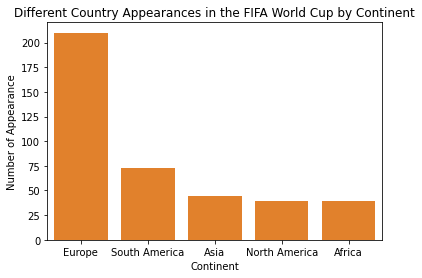

In [97]:
base_color = sb.color_palette()[1]
display(top_participants_continent)
sb.barplot(top_participants_continent.index, top_participants_continent, color=base_color)
plt.xlabel('Continent')
plt.ylabel('Number of Appearance')
plt.title('Different Country Appearances in the FIFA World Cup by Continent');

### What impact does a country's continent have on the appearance of spectators?

countries in South America has better turn out of spectators than others over the years of the FIFA World Cup tournament.

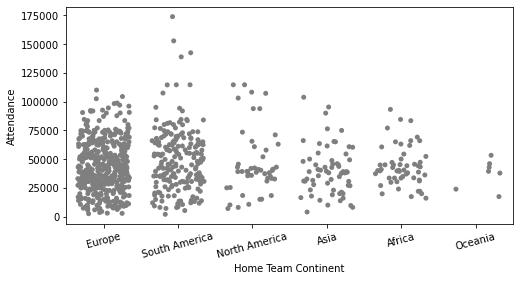

In [98]:
display_color = sb.color_palette()[7]
plt.figure(figsize = (8, 4))
sb.stripplot(data = matches_clean_df, x = 'Home Team Continent', y = 'Attendance', color = display_color, jitter = 0.35)
plt.xticks(rotation = 15);

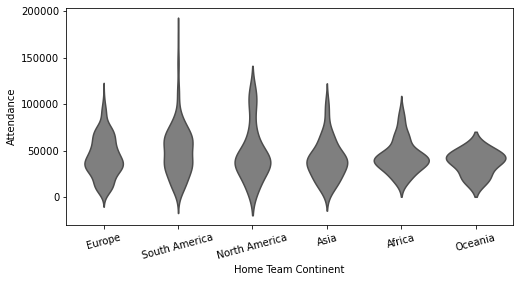

In [99]:
plt.figure(figsize = (8, 4))
sb.violinplot(data = matches_clean_df, x = 'Home Team Continent', y = 'Attendance', color = display_color, inner = None)
plt.xticks(rotation = 15);

### Which country has the highest number of FIFA World Cup trophies?

Brazil a country in South America has the most FIFA World Cup trophies than other countries over the years of the tournament.

Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
Name: Winner, dtype: int64

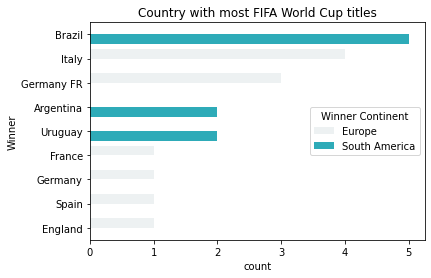

In [100]:
winners = worldCup_clean_df.Winner.value_counts()
display(winners.head())
sb.countplot(data = worldCup_clean_df, y ='Winner', hue = 'Winner Continent', order = winners.index, color = sb.color_palette()[9] )
plt.title('Country with most FIFA World Cup titles');

In [110]:
# Use this command if you are running this file in local

!jupyter nbconvert Part_II_Exploration_fifa_world_cup_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Exploration_fifa_world_cup_slide_deck.ipynb to slides
[NbConvertApp] Writing 716797 bytes to Part_II_Exploration_fifa_world_cup_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Anele\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Anele\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Anele\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Anele\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Anele\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    se